<a href="https://colab.research.google.com/github/XavierCarrera/Blood-Stream-App/blob/master/BI_Dashboard_Bloodstream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [258]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

In [ ]:
df = pd.read_csv('clean-dataset.csv')
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'URL', 'ID', 'Name', 'Icon URL',
       'Description', 'Developer', 'Age Rating', 'Languages', 'Size',
       'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date'],
      dtype='object')

In [ ]:
df = df.drop(["Unnamed: 0", "Unnamed: 0.1", "URL", "ID", "Name", "Icon URL", "Description", "Size", "Developer", "Original Release Date", "Current Version Release Date"], axis=1)
df

,Age Rating,Languages,Primary Genre,Genres
0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",Games,"Games, Strategy, Puzzle"
1,4+,EN,Games,"Games, Strategy, Board"
2,4+,EN,Games,"Games, Board, Strategy"
3,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",Games,"Games, Strategy, Puzzle"
4,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",Games,"Games, Strategy, Board, Education"
...,...,...,...,...
16738,4+,EN,Games,"Games, Entertainment, Casual, Strategy"
16739,4+,EN,Games,"Games, Family, Strategy"
16740,4+,EN,Games,"Games, Strategy"
16741,4+,EN,Games,"Games, Strategy, Action"


# Working Functions

In [ ]:
def unique_values(y):
  unique = []

  for x in y:
    if x not in unique:
      unique.append(x)

  unique = np.concatenate(unique, axis=None)
  unique = np.unique(unique)
  unique = np.delete(unique, -1)
  print(unique)
  print("Number of elements: " + str(unique.size))
  return unique

In [ ]:
def column_filler(df, column, key):
  
  try: 
    for x in df:
      column = np.where(column.str.contains(pat=key), 1, 0)
      continue
  except:
    print("Invalid value detected")

  return df

## Age Rating Analysis

In [ ]:
age_array = np.array(df["Age Rating"].str.split(", "))

age_columns = unique_values(age_array)

['12+' '17+' '4+' '9+']
Number of elements: 4


In [ ]:
age_df = pd.DataFrame(columns = age_columns)
age_df["Age Raiting"] = df["Age Rating"]
age_df

,12+,17+,4+,9+,Age Raiting
0,NaN,NaN,NaN,NaN,4+
1,NaN,NaN,NaN,NaN,4+
2,NaN,NaN,NaN,NaN,4+
3,NaN,NaN,NaN,NaN,4+
4,NaN,NaN,NaN,NaN,4+
...,...,...,...,...,...
16738,NaN,NaN,NaN,NaN,4+
16739,NaN,NaN,NaN,NaN,4+
16740,NaN,NaN,NaN,NaN,4+
16741,NaN,NaN,NaN,NaN,4+


In [ ]:
age_df = column_filler(age_df, age_df["Age Raiting"], age_df[0:-1])

# age_df["12+"] = np.where(age_df["Age Raiting"].str.contains(pat="12+"), 1, 0)

age_df

Invalid value detected


,12+,17+,4+,9+,Age Raiting
0,0,0,1,0,4+
1,0,0,1,0,4+
2,0,0,1,0,4+
3,0,0,1,0,4+
4,0,0,1,0,4+
...,...,...,...,...,...
16738,0,0,1,0,4+
16739,0,0,1,0,4+
16740,0,0,1,0,4+
16741,0,0,1,0,4+


In [ ]:
total_4 = np.count_nonzero(age_df["4+"])
total_9 = np.count_nonzero(age_df["9+"])
total_12 = np.count_nonzero(age_df["12+"])
total_17 = np.count_nonzero(age_df["17+"])
age_raiting = ["4+", "9+", "12+", "17+"] 
total_age = [total_4, total_9, total_12, total_17]
print(age_raiting)
print(total_age)

['4+', '9+', '12+', '17+']
[11624, 2447, 2017, 654]


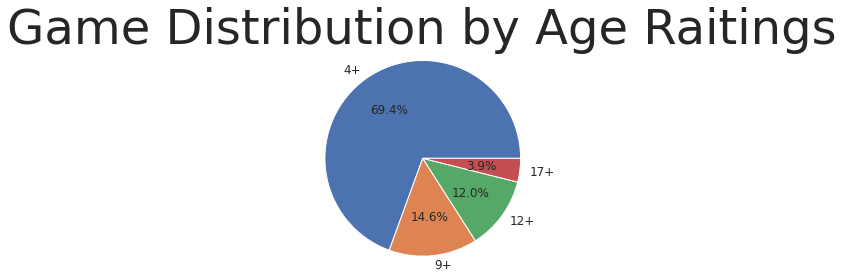

In [256]:
fig, ax = plt.subplots()
ax.pie(total_age, labels=age_raiting, autopct='%1.1f%%', textprops={'fontsize': 12})
ax.axis("equal")
ax.set_title("Game Distribution by Age Raitings")
plt.show()

# Languages Analysis

In [ ]:
language_array = np.array(df["Languages"].str.split(", "))

language_columns = unique_values(language_array)

['AF' 'AM' 'AR' 'AS' 'AY' 'AZ' 'BE' 'BG' 'BN' 'BO' 'BR' 'BS' 'CA' 'CS'
 'CY' 'DA' 'DE' 'DZ' 'EL' 'EN' 'EO' 'ES' 'ET' 'EU' 'FA' 'FI' 'FO' 'FR'
 'GA' 'GD' 'GL' 'GN' 'GU' 'GV' 'HE' 'HI' 'HR' 'HU' 'HY' 'ID' 'IS' 'IT'
 'IU' 'JA' 'JV' 'KA' 'KK' 'KL' 'KM' 'KN' 'KO' 'KR' 'KS' 'KU' 'KY' 'LA'
 'LO' 'LT' 'LV' 'MG' 'MI' 'MK' 'ML' 'MN' 'MR' 'MS' 'MT' 'MY' 'NB' 'NE'
 'NL' 'NN' 'NO' 'OM' 'OR' 'PA' 'PL' 'PS' 'PT' 'QU' 'RN' 'RO' 'RU' 'RW'
 'SA' 'SD' 'SE' 'SI' 'SK' 'SL' 'SO' 'SQ' 'SR' 'SU' 'SV' 'SW' 'TA' 'TE'
 'TG' 'TH' 'TI' 'TK' 'TL' 'TO' 'TR' 'TT' 'UG' 'UK' 'UR' 'UZ' 'VI' 'XH'
 'YI' 'ZH' 'ZU']
Number of elements: 115


In [ ]:
lang_df = pd.DataFrame(columns = language_columns)
lang_df["Languages"] = df["Languages"]
lang_df

,AF,AM,AR,AS,AY,AZ,BE,BG,BN,BO,BR,BS,CA,CS,CY,DA,DE,DZ,EL,EN,EO,ES,ET,EU,FA,FI,FO,FR,GA,GD,GL,GN,GU,GV,HE,HI,HR,HU,HY,ID,...,PL,PS,PT,QU,RN,RO,RU,RW,SA,SD,SE,SI,SK,SL,SO,SQ,SR,SU,SV,SW,TA,TE,TG,TH,TI,TK,TL,TO,TR,TT,UG,UK,UR,UZ,VI,XH,YI,ZH,ZU,Languages
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN
16739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN
16740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN
16741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN


In [ ]:
lang_df = column_filler(lang_df, lang_df["Languages"], lang_df[0:-1])

lang_df

Invalid value detected


,AF,AM,AR,AS,AY,AZ,BE,BG,BN,BO,BR,BS,CA,CS,CY,DA,DE,DZ,EL,EN,EO,ES,ET,EU,FA,FI,FO,FR,GA,GD,GL,GN,GU,GV,HE,HI,HR,HU,HY,ID,...,PL,PS,PT,QU,RN,RO,RU,RW,SA,SD,SE,SI,SK,SL,SO,SQ,SR,SU,SV,SW,TA,TE,TG,TH,TI,TK,TL,TO,TR,TT,UG,UK,UR,UZ,VI,XH,YI,ZH,ZU,Languages
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT..."
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EN
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EN
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT..."
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EN
16739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EN
16740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EN
16741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EN


In [ ]:
lang_df["EN"].value_counts()

1    16631
0      112
Name: EN, dtype: int64

In [ ]:
total_EN = np.count_nonzero(lang_df["EN"])
print("Total games in English: " + str(total_EN))
print("Total percentage of games in English: " + str(round(total_EN / 16742, 3)*100) + "%")
print("Number of games not available in Enlgish: " + str(16742 - total_EN))

Total games in English: 16631
Total percentage of games in English: 99.3%
Number of games not available in Enlgish: 111


In [ ]:
lang_sum = pd.DataFrame(lang_df.sum(axis=0))
lang_sum = lang_sum.drop(["EN", "Languages"], axis=0)
lang_sum = lang_sum.rename(columns = {0: "SUM"})
lang_sum = lang_sum.sort_values(by="SUM", ascending=False)
lang_sum

,SUM
ZH,2836
DE,2566
FR,2493
ES,2389
JA,2334
...,...
QU,1
SU,1
RN,1
RW,1


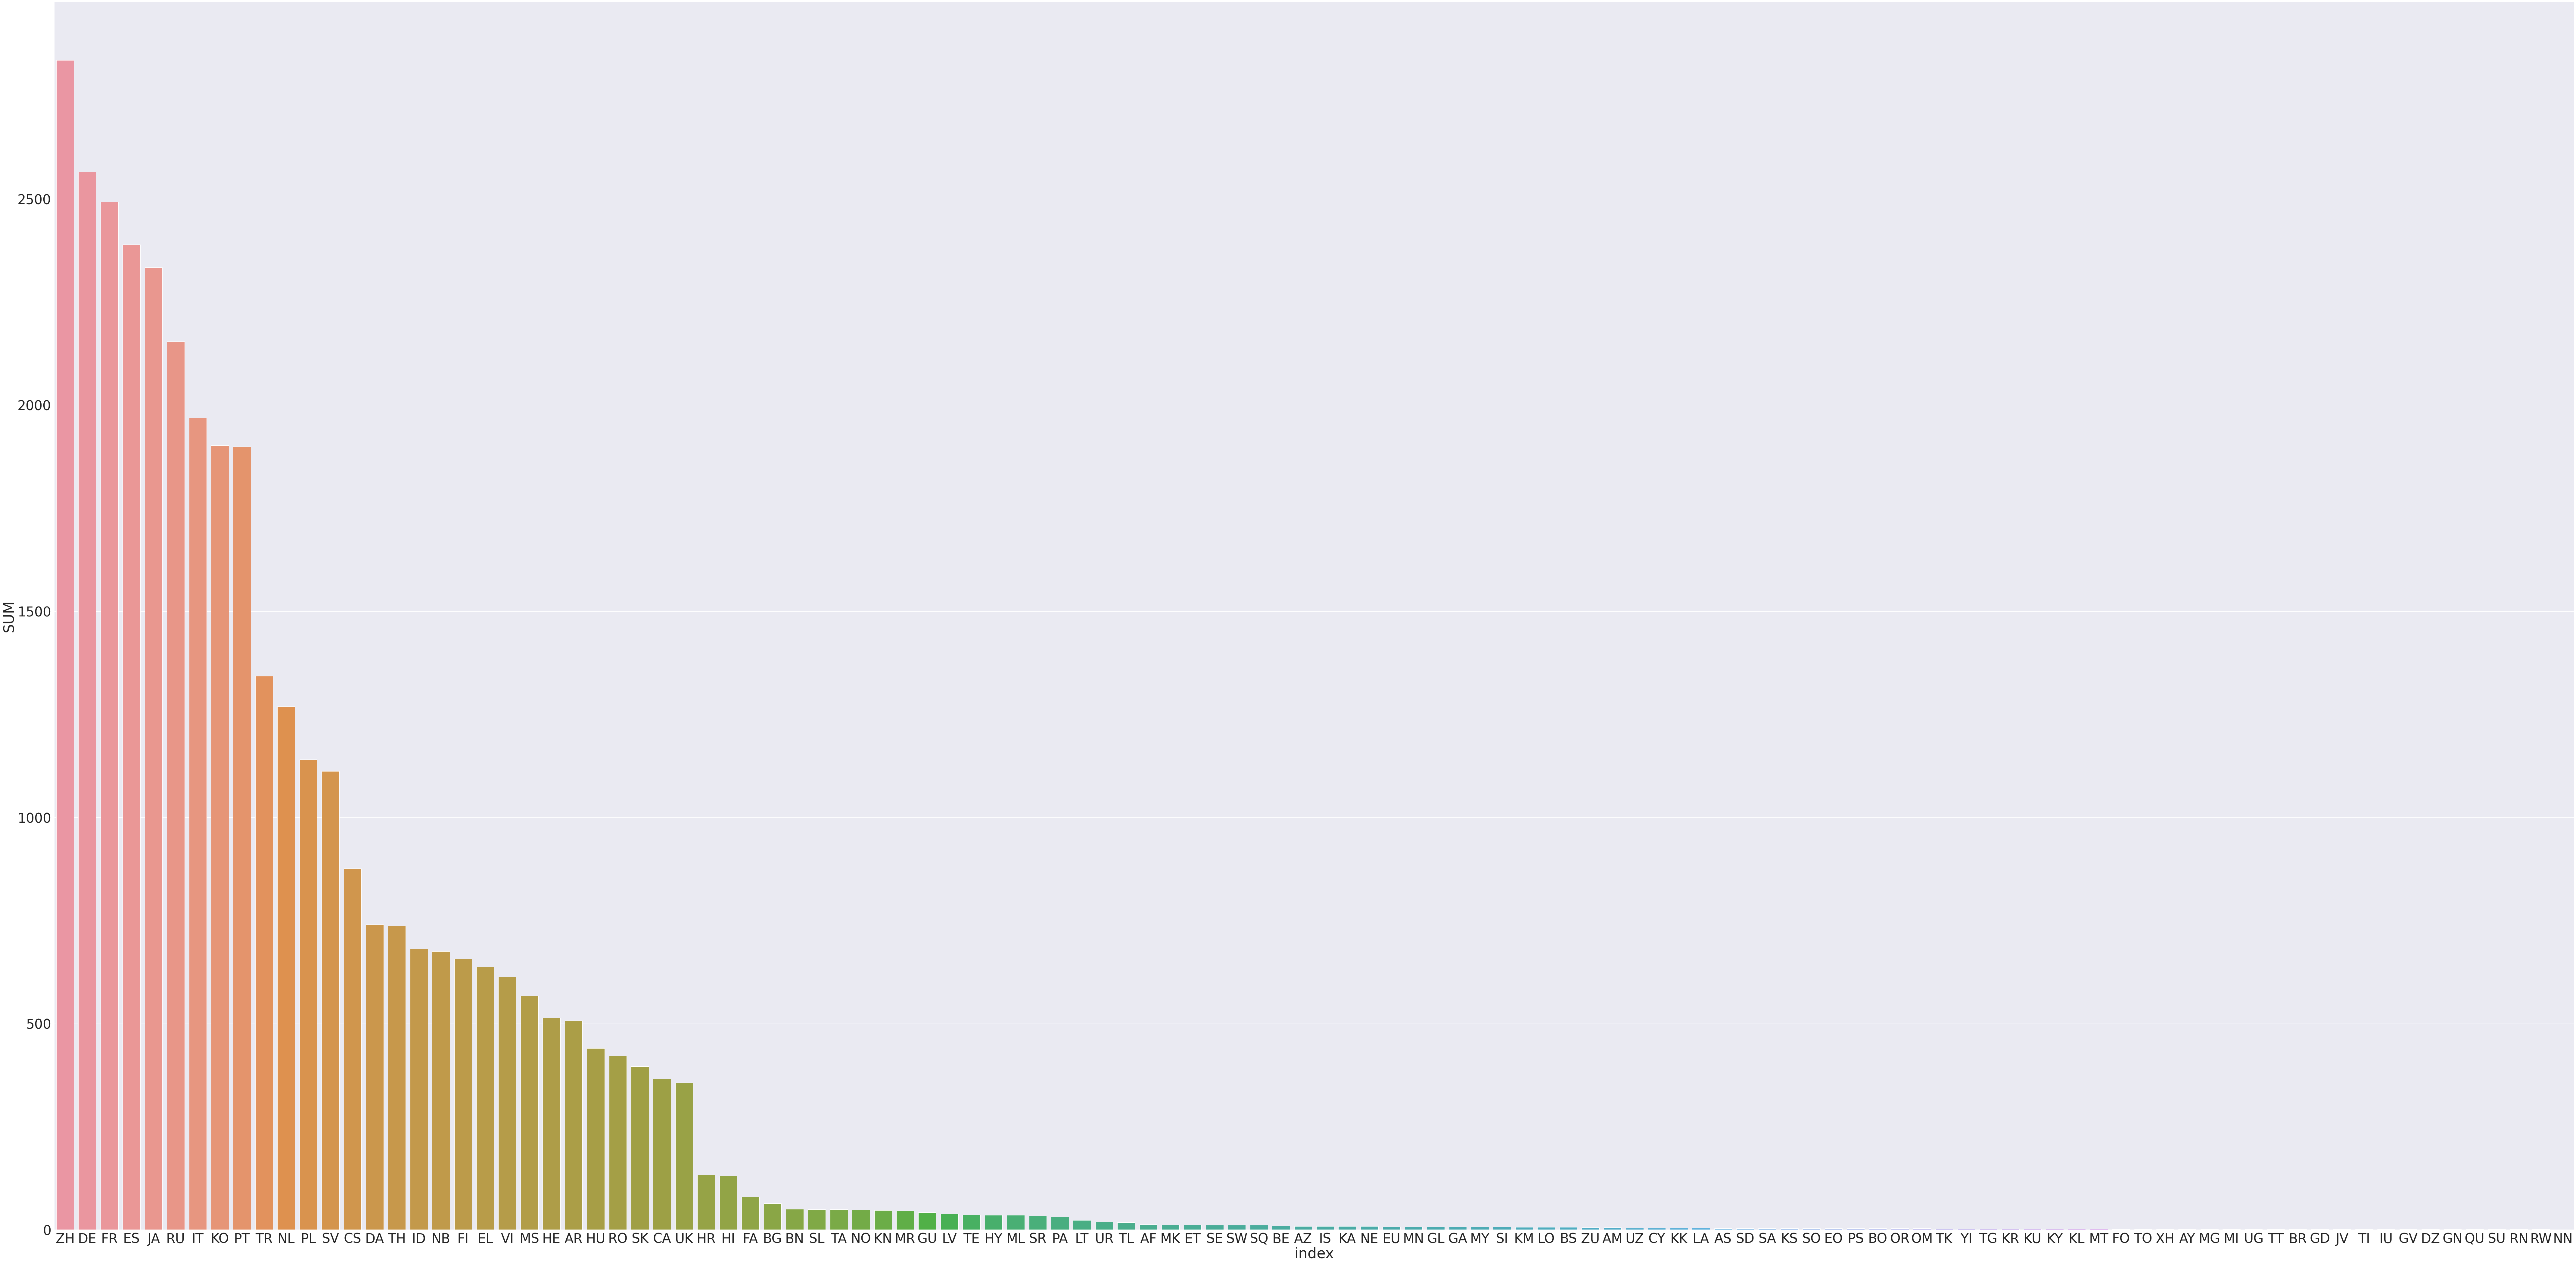

In [ ]:
plt.figure(figsize=(150, 75))
sns.set(font_scale=4)
ax.set(xlabel="Langauges", ylabel="Available games")
sns.barplot(data=lang_sum.reset_index(), x="index", y="SUM")

plt.show()

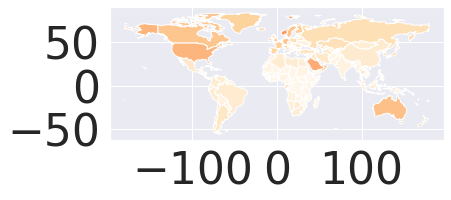

In [271]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap', cmap='OrRd')

# Genres Analysis

In [ ]:
genre_array = np.array(df["Genres"].str.split(", "))

genre_columns = unique_values(genre_array)

['Action' 'Adventure' 'Animals & Nature' 'Art' 'Board' 'Books' 'Business'
 'Card' 'Casino' 'Casual' 'Comics & Cartoons' 'Education'
 'Emoji & Expressions' 'Entertainment' 'Family' 'Finance' 'Food & Drink'
 'Games' 'Gaming' 'Health & Fitness' 'Kids & Family' 'Lifestyle'
 'Magazines & Newspapers' 'Medical' 'Music' 'Navigation' 'News' 'People'
 'Photo & Video' 'Places & Objects' 'Productivity' 'Puzzle' 'Racing'
 'Reference' 'Role Playing' 'Shopping' 'Simulation' 'Social Networking'
 'Sports' 'Sports & Activities' 'Stickers' 'Strategy' 'Travel' 'Trivia'
 'Utilities' 'Weather' 'Word']
Number of elements: 47


In [ ]:
gen_df = pd.DataFrame(columns = genre_columns)
gen_df["Genres"] = df["Genres"]
gen_df

,Action,Adventure,Animals & Nature,Art,Board,Books,Business,Card,Casino,Casual,Comics & Cartoons,Education,Emoji & Expressions,Entertainment,Family,Finance,Food & Drink,Games,Gaming,Health & Fitness,Kids & Family,Lifestyle,Magazines & Newspapers,Medical,Music,Navigation,News,People,Photo & Video,Places & Objects,Productivity,Puzzle,Racing,Reference,Role Playing,Shopping,Simulation,Social Networking,Sports,Sports & Activities,Stickers,Strategy,Travel,Trivia,Utilities,Weather,Word,Genres
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Games, Strategy, Puzzle"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Games, Strategy, Board"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Games, Board, Strategy"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Games, Strategy, Puzzle"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Games, Strategy, Board, Education"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Games, Entertainment, Casual, Strategy"
16739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Games, Family, Strategy"
16740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Games, Strategy"
16741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Games, Strategy, Action"


In [ ]:
gen_df = column_filler(gen_df, gen_df["Genres"], gen_df[0:-1])

gen_df

,Action,Adventure,Animals & Nature,Art,Board,Books,Business,Card,Casino,Casual,Comics & Cartoons,Education,Emoji & Expressions,Entertainment,Family,Finance,Food & Drink,Games,Gaming,Health & Fitness,Kids & Family,Lifestyle,Magazines & Newspapers,Medical,Music,Navigation,News,People,Photo & Video,Places & Objects,Productivity,Puzzle,Racing,Reference,Role Playing,Shopping,Simulation,Social Networking,Sports,Sports & Activities,Stickers,Strategy,Travel,Trivia,Utilities,Weather,Word,Genres
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Games, Strategy, Puzzle"
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Games, Strategy, Board"
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Games, Board, Strategy"
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Games, Strategy, Puzzle"
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Games, Strategy, Board, Education"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Games, Entertainment, Casual, Strategy"
16739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Games, Family, Strategy"
16740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Games, Strategy"
16741,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Games, Strategy, Action"


In [ ]:
gen_df["Strategy"].value_counts()

1    16741
0        2
Name: Strategy, dtype: int64

In [ ]:
total_strategy = np.count_nonzero(gen_df["Strategy"])
print("Total strategy games: " + str(total_strategy))
print("Total percentage of strategy games: " + str(round(total_strategy / 16742, 4)*100) + "%")
print("Number of non-strategy games: " + str(16742 - total_strategy))

Total strategy games: 16741
Total percentage of strategy games: 99.99%
Number of non-strategy games: 1


In [ ]:
gen_sum = pd.DataFrame(gen_df.sum(axis=0))
gen_sum = gen_sum.drop(["Genres", "Games", "Strategy"], axis=0)
gen_sum = gen_sum.rename(columns = {0: "SUM"})
gen_sum = gen_sum.sort_values(by="SUM", ascending=False)
gen_sum

,SUM
Entertainment,7876
Puzzle,3900
Simulation,2107
Action,1980
Board,1687
Casual,1681
Role Playing,1114
Education,931
Adventure,820
Family,762


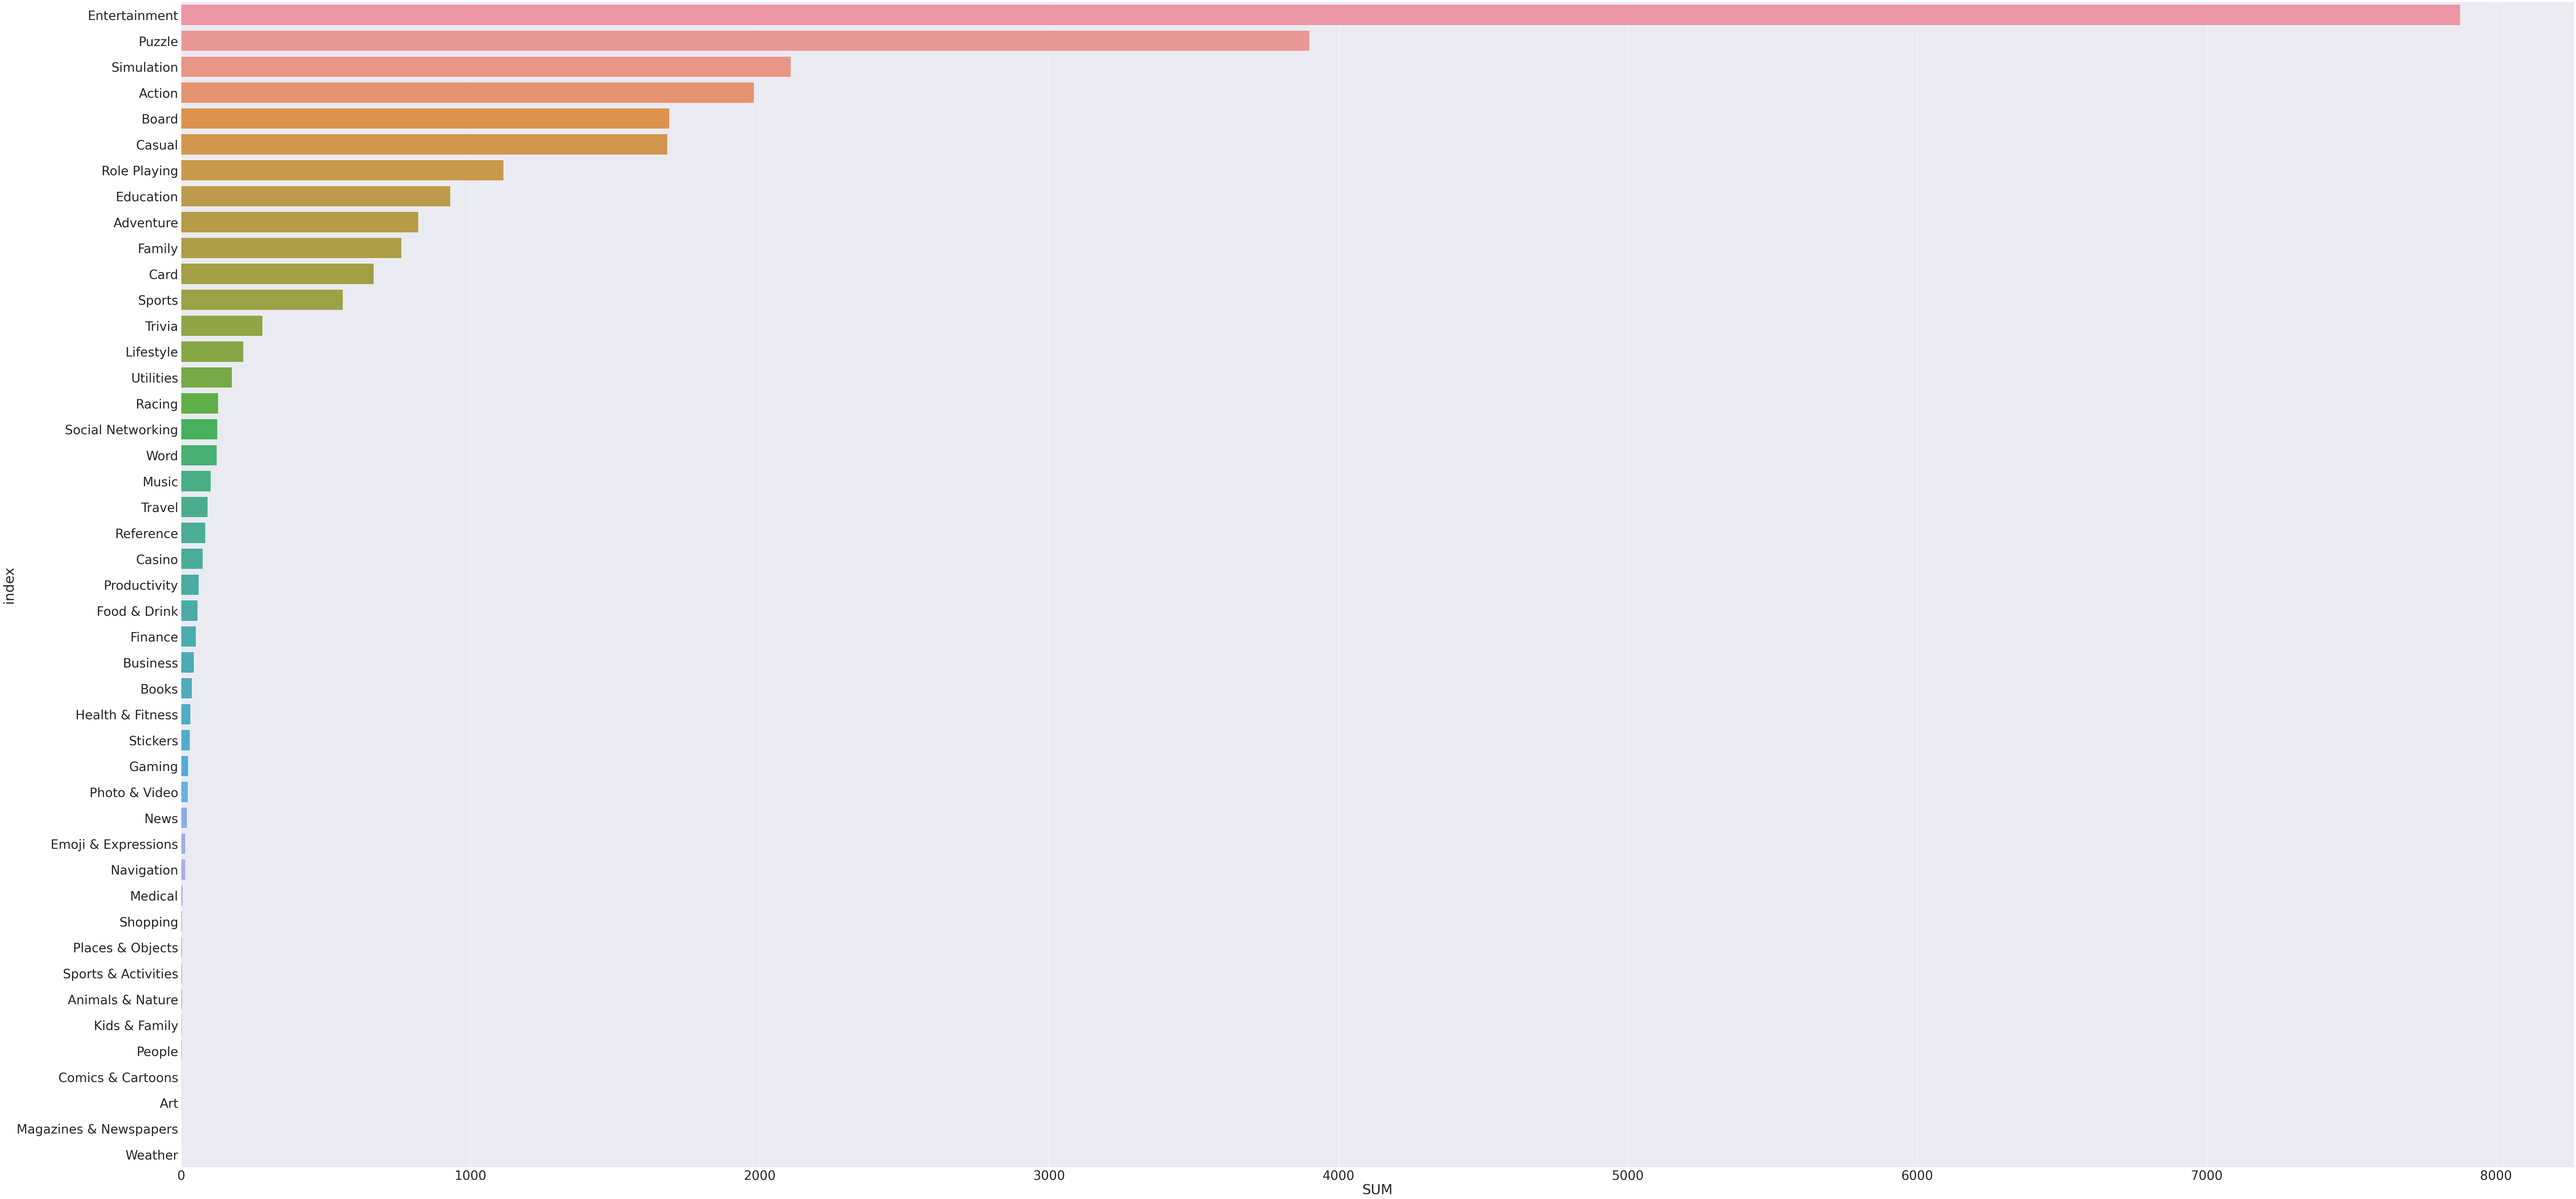

In [ ]:
plt.figure(figsize=(150, 75))
sns.set(font_scale=4)
ax.set(xlabel="Genres", ylabel="Available games")
sns.barplot(data=gen_sum.reset_index(), x="SUM", y="index")

plt.show() 

# Linnear Regression Analysis